### TAREA 1 COSMOLOGIA
Alejandro Gutiérrez 20.677.580-7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import camb

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


## P6

In [14]:
# Parametros
H0 = 67.4 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k

In [15]:
# Dar parametros y obtener resultados
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars.set_dark_energy(w=-1);

results = camb.get_results(pars)

In [16]:
# Obtener densidades
# https://camb.readthedocs.io/en/latest/results.html#camb.results.CAMBdata.get_background_densities

zs = np.linspace(0, 10, 1_000) # red shift
aa = np.linspace(0, 1, 100) # scale factor
densities = results.get_background_densities(aa)

a_omega_m = (densities['baryon'] + densities['cdm'])/densities['tot'] # matter + cold dark matter
a_omega_r = densities['photon']/densities['tot'] # radiation
# radiation with neutrinos(matter) and neutrinos (energy contribution):
#a_omega_r = (densities['photon'] + densities['neutrino'] + densities['nu'])/densities['tot']
a_omega_k = densities['K']/densities['tot'] # curvature
a_omega_de = densities['de']/densities['tot'] # DE


Text(0, 0.5, '$\\Omega_{s}$')

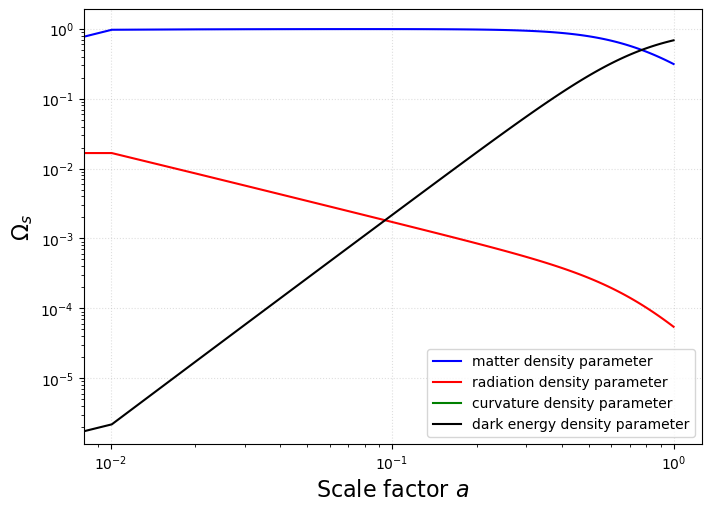

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(7, 5), constrained_layout = True)

ax.loglog(aa, a_omega_m, color='blue', label='matter density parameter')
ax.loglog(aa, a_omega_r, color='red', label='radiation density parameter')
ax.loglog(aa, a_omega_k, color='green', label='curvature density parameter')
ax.loglog(aa, a_omega_de, color='black', label='dark energy density parameter')

#ax.set_yscale('log')

ax.grid(alpha=0.4, ls=':')

ax.legend()
ax.set_xlabel(r'Scale factor $a$', fontsize=16)
ax.set_ylabel(r'$\Omega_{s}$', fontsize=16)

## P7

In [21]:
# parametros
#Omegab = 0.05
#Omegac = 0.2
#Omegam = Omegab + Omegac # MATTER (BARIONS + Cold Dark Matter)
#Omegal = 0.75 # DE
#Omegar = 10**(-4) # RADIATION
#Omegak = 0 # CURVATURE
H0 = 67.4
c = 3*10**8

# Funciones necesarias
def Fk(z,Omegar,Omegam,Omegal,Omegak):
    y,err = quad(f,0,z,args=(Omegar,Omegam,Omegal,Omegak))
    if Omegak > 0:
        output = c*np.sinh(np.sqrt(Omegak)*y)/(H0*np.sqrt(Omegak))
    elif Omegak == 0:
        output = c*y/H0
    else:
        output = c*np.sin(np.sqrt(-Omegak)*y)/(H0*np.sqrt(-Omegak))
    return output


def f(z,Omegar,Omegam,Omegal,Omegak):
    return 1/E(z,Omegar,Omegam,Omegal,Omegak)


def Hz(z,Omegar,Omegam,Omegal,Omegak):
    z1 = 1 + z
    output = H0**2*(Omegar*z1**4 + Omegam*z1**3 + Omegal*z1**(3*(1+w)) + Omegak*z1**2) 
    return output


def E(z,Omegar,Omegam,Omegal,Omegak):
    return Hz(z,Omegar,Omegam,Omegal,Omegak)/H0 

In [17]:
# Arreglos
# Se asume Omega_radiacion = 0
zr = 1 # red shift
Omega_m_0 = np.linspace(0, 1, 100)
Omega_lambda_0 = np.linspace(0, 1, 100)